In [168]:
import pandas as pd

from preprocessing import get_state_data, get_daily_cases_data, remove_outliers

covid_cases_data_path = './dataset/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'

ct_state_cases_data, fl_state_cases_data = get_state_data(filename=covid_cases_data_path,
                                                              states=['CT', 'FL'],
                                                              location_col_name='state',
                                                              cols=['submission_date', 'state',
                                                                    'tot_cases', 'tot_death',
                                                                    'new_case', 'new_death'])

ct_daily_cases_data = get_daily_cases_data(ct_state_cases_data, location_col_name='state',
                                               date_col_name='submission_date',
                                               non_cumulative_cols=['new_case', 'new_death'],
                                               set_zero_for_negatives=True)
fl_daily_cases_data = get_daily_cases_data(fl_state_cases_data, location_col_name='state',
                                               date_col_name='submission_date',
                                               non_cumulative_cols=['new_case', 'new_death'],
                                               set_zero_for_negatives=True)



State: CT rows with missing values: 0
State: FL rows with missing values: 0
2 negative values in daily data for col tot_cases
19 negative values in daily data for col tot_death
0 negative values in daily data for col tot_cases
0 negative values in daily data for col tot_death


/Users/mayankmanuja/work/cse544-project/preprocessing.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_df[col][daily_data_df[col] < 0] = 0


In [169]:
import scipy.special
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [170]:
#Conneticut analysis

# Week 1-4
ct_daily_cases_data['daily_stats'] = ct_daily_cases_data['tot_cases'] + ct_daily_cases_data['tot_death']
four_week_data = ct_daily_cases_data[ct_daily_cases_data['submission_date'] > '2020-05-31']
four_week_data = four_week_data[four_week_data['submission_date'] < '2020-06-29']
beta = 1/four_week_data['daily_stats'].mean()
x = np.linspace(0, 250, 250)
y1 = stats.gamma.pdf(x, a=1, scale=1/beta)

# Week 5
fifth_week_data = ct_daily_cases_data[ct_daily_cases_data['submission_date'] > '2020-06-28']
fifth_week_data = fifth_week_data[fifth_week_data['submission_date'] < '2020-07-06']
alpha_1 = 1 + fifth_week_data['daily_stats'].sum()
beta_1 = beta + len(fifth_week_data)
y2 = stats.gamma.pdf(x, a=alpha_1, scale=1/beta_1)

# Week 6
sixth_week_data = ct_daily_cases_data[ct_daily_cases_data['submission_date'] > '2020-07-06']
sixth_week_data = sixth_week_data[sixth_week_data['submission_date'] < '2020-07-14']
alpha_2 = alpha_1 + sixth_week_data['daily_stats'].sum()
beta_2 = beta_1 + len(sixth_week_data)
y3 = stats.gamma.pdf(x, a=alpha_2, scale=1/beta_2)

# Week 7
seventh_week_data = ct_daily_cases_data[ct_daily_cases_data['submission_date'] > '2020-07-14']
seventh_week_data = seventh_week_data[seventh_week_data['submission_date'] < '2020-07-22']
alpha_3 = alpha_2 + seventh_week_data['daily_stats'].sum()
beta_3 = beta_2 + len(seventh_week_data)
y4 = stats.gamma.pdf(x, a=alpha_3, scale=1/beta_3)

# Week 8
eightht_week_data = ct_daily_cases_data[ct_daily_cases_data['submission_date'] > '2020-07-22']
eightht_week_data = eightht_week_data[eightht_week_data['submission_date'] < '2020-07-30']
alpha_4 = alpha_3 + eightht_week_data['daily_stats'].sum()
beta_4 = beta_3 + len(eightht_week_data)
y5 = stats.gamma.pdf(x, a=alpha_4, scale=1/beta_4)

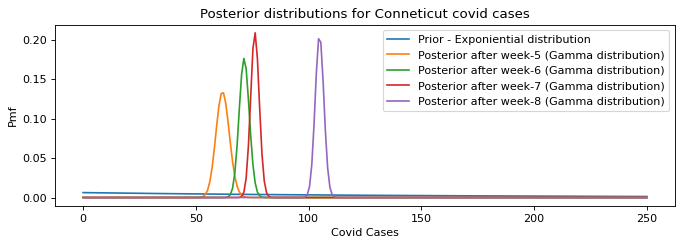

MAP for posterior after week 5: 62
MAP for posterior after week 6: 71
MAP for posterior after week 7: 76
MAP for posterior after week 8: 104


In [171]:
from matplotlib.pyplot import figure
figure(figsize=(10, 3), dpi=80)
plt.plot(x, y1, label='Prior - Exponiential distribution')
plt.plot(x, y2, label='Posterior after week-5 (Gamma distribution)')
plt.plot(x, y3, label='Posterior after week-6 (Gamma distribution)')
plt.plot(x, y4, label='Posterior after week-7 (Gamma distribution)')
plt.plot(x, y5, label='Posterior after week-8 (Gamma distribution)')
plt.xlabel('Covid Cases') 
plt.ylabel('Pmf') 
  
# displaying the title
plt.title("Posterior distributions for Conneticut covid cases")
plt.legend()
plt.show()
y2 = y2.tolist()
max_index = y2.index(max(y2))
print("MAP for posterior after week 5:", max_index)

y3 = y3.tolist()
max_index = y3.index(max(y3))
print("MAP for posterior after week 6:", max_index)

y4 = y4.tolist()
max_index = y4.index(max(y4))
print("MAP for posterior after week 7:", max_index)

y5 = y5.tolist()
max_index = y5.index(max(y5))
print("MAP for posterior after week 8:", max_index)

In [172]:

#Florida analysis

# Week 1-4
fl_daily_cases_data['daily_stats'] = fl_daily_cases_data['tot_cases'] + fl_daily_cases_data['tot_death']
four_week_data = fl_daily_cases_data[fl_daily_cases_data['submission_date'] > '2020-05-31']
four_week_data = four_week_data[four_week_data['submission_date'] < '2020-06-29']
beta = 1/four_week_data['daily_stats'].mean()
x = np.linspace(8000, 11000, 11000)
y1 = stats.gamma.pdf(x, a=1, scale=1/beta)

# Week 5
fifth_week_data = fl_daily_cases_data[fl_daily_cases_data['submission_date'] > '2020-06-28']
fifth_week_data = fifth_week_data[fifth_week_data['submission_date'] < '2020-07-06']
alpha_1 = 1 + fifth_week_data['daily_stats'].sum()
beta_1 = beta + len(fifth_week_data)
y2 = stats.gamma.pdf(x, a=alpha_1, scale=1/beta_1)

# Week 6
sixth_week_data = fl_daily_cases_data[fl_daily_cases_data['submission_date'] > '2020-07-06']
sixth_week_data = sixth_week_data[sixth_week_data['submission_date'] < '2020-07-14']
alpha_2 = alpha_1 + sixth_week_data['daily_stats'].sum()
beta_2 = beta_1 + len(sixth_week_data)
y3 = stats.gamma.pdf(x, a=alpha_2, scale=1/beta_2)

# Week 7
seventh_week_data = fl_daily_cases_data[fl_daily_cases_data['submission_date'] > '2020-07-14']
seventh_week_data = seventh_week_data[seventh_week_data['submission_date'] < '2020-07-22']
alpha_3 = alpha_2 + seventh_week_data['daily_stats'].sum()
beta_3 = beta_2 + len(seventh_week_data)
y4 = stats.gamma.pdf(x, a=alpha_3, scale=1/beta_3)

# Week 8
eightht_week_data = fl_daily_cases_data[fl_daily_cases_data['submission_date'] > '2020-07-22']
eightht_week_data = eightht_week_data[eightht_week_data['submission_date'] < '2020-07-30']
alpha_4 = alpha_3 + eightht_week_data['daily_stats'].sum()
beta_4 = beta_3 + len(eightht_week_data)
y5 = stats.gamma.pdf(x, a=alpha_4, scale=1/beta_4)

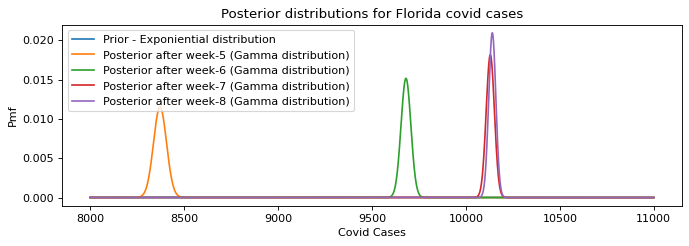

MAP for posterior after week 5: 1363
MAP for posterior after week 6: 6163
MAP for posterior after week 7: 7809
MAP for posterior after week 8: 7848


In [173]:
from matplotlib.pyplot import figure
figure(figsize=(10, 3), dpi=80)
plt.plot(x, y1, label='Prior - Exponiential distribution')
plt.plot(x, y2, label='Posterior after week-5 (Gamma distribution)')
plt.plot(x, y3, label='Posterior after week-6 (Gamma distribution)')
plt.plot(x, y4, label='Posterior after week-7 (Gamma distribution)')
plt.plot(x, y5, label='Posterior after week-8 (Gamma distribution)')
plt.xlabel('Covid Cases') 
plt.ylabel('Pmf') 
  
# displaying the title
plt.title("Posterior distributions for Florida covid cases")
plt.legend()
plt.show()
y2 = y2.tolist()
max_index = y2.index(max(y2))
print("MAP for posterior after week 5:", max_index)

y3 = y3.tolist()
max_index = y3.index(max(y3))
print("MAP for posterior after week 6:", max_index)

y4 = y4.tolist()
max_index = y4.index(max(y4))
print("MAP for posterior after week 7:", max_index)

y5 = y5.tolist()
max_index = y5.index(max(y5))
print("MAP for posterior after week 8:", max_index)